In [1]:
# Import libraries

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV


df = pd.read_csv('profiles.csv')

### Features: diet, drinks, drugs, smokes
### Label: body_type

df.body_type.value_counts()

average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64

In [2]:
sporty = ['fit', 'athletic', 'thin', 'skinny']
average = ['average']
curvy = ['curvy', 'a little extra', 'full figured']
bad = ['overweight', 'jacked', 'used up', 'rather not say']

body_mapping = {'fit': 'sporty', 'athletic': 'sporty', 'thin': 'sporty', 'skinny': 'sporty',
               'average': 'average',
               'curvy': 'curvy', 'a little extra': 'curvy', 'full figured': 'curvy',
               'overweight': 'bad', 'jacked': 'bad', 'used up': 'bad', 'rather not say': 'bad'}

df['body_labels'] = df.body_type.map(body_mapping)



In [3]:
df.diet.value_counts()

mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly kosher           18
strictly halal            18
kosher                    11
halal                     11
Name: diet, dtype: int64

In [4]:
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
df["drinks_code"] = df.drinks.map(drink_mapping)

drugs_mapping = {"never": 0, "sometimes": 1, "often": 2}
df["drugs_code"] = df.drugs.map(drugs_mapping)

smokes_mapping = {"no": 0, "sometimes": 1, "when drinking": 2, "yes": 3, "trying to quit": 4}
df["smokes_code"] = df.smokes.map(smokes_mapping)

diet_values = df.diet.dropna().unique().tolist()

#print(diet_values)

for item in diet_values:
    df[item] = np.where(df.diet.str.match(item), 1, 0)


df_ohne_nan = df.dropna(subset=['body_type', 'diet', 'drinks_code','drugs_code', 'smokes_code'])
df_features_food = df_ohne_nan[['strictly anything', 'mostly other', 'anything', 'vegetarian', 'mostly anything', 'mostly vegetarian', 'strictly vegan', 'strictly vegetarian', 'mostly vegan', 'strictly other', 'mostly halal', 'other', 'vegan', 'mostly kosher', 'strictly halal', 'halal', 'strictly kosher', 'kosher']]
df_features_all = df_ohne_nan[['drinks_code','drugs_code', 'smokes_code', 'strictly anything', 'mostly other', 'anything', 'vegetarian', 'mostly anything', 'mostly vegetarian', 'strictly vegan', 'strictly vegetarian', 'mostly vegan', 'strictly other', 'mostly halal', 'other', 'vegan', 'mostly kosher', 'strictly halal', 'halal', 'strictly kosher', 'kosher']]
df_features_no_food = df_ohne_nan[['drinks_code','drugs_code', 'smokes_code']]
df_labels = df_ohne_nan[['body_labels']]



In [5]:
#feature_data = all_data[['smokes_code', 'drinks_code', 'drugs_code', 'essay_len', 'avg_word_length']]

x = df_features_all.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_features_all = pd.DataFrame(x_scaled, columns=df_features_all.columns)

x_no_food = df_features_no_food.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_no_food)
df_features_no_food = pd.DataFrame(x_scaled, columns=df_features_no_food.columns)

x_food = df_features_food.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_food)
df_features_food = pd.DataFrame(x_scaled, columns=df_features_food.columns)


In [7]:
df_ohne_nan.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,mostly vegan,strictly other,mostly halal,other,vegan,mostly kosher,strictly halal,halal,strictly kosher,kosher
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,0,0,0,0,0,0,0,0,0,0
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,0,0,0,0,0,0,0,0,0,0
7,31,average,mostly anything,socially,never,graduated from college/university,NaN,"writing. meeting new people, spending time wit...","remembering people's birthdays, sending cards,...",i'm rather approachable (a byproduct of being ...,...,0,0,0,0,0,0,0,0,0,0
9,37,athletic,mostly anything,not at all,never,working on two-year college,my names jake.<br />\ni'm a creative guy and i...,i have an apartment. i like to explore and che...,i'm good at finding creative solutions to prob...,i'm short,...,0,0,0,0,0,0,0,0,0,0
11,28,average,mostly anything,socially,never,graduated from college/university,"i was born in wisconsin, grew up in iowa, and ...",i'm currently the youngest member on an intern...,i'm really good at a little bit of everything....,"the way i dress. some days it's hats, other da...",...,0,0,0,0,0,0,0,0,0,0


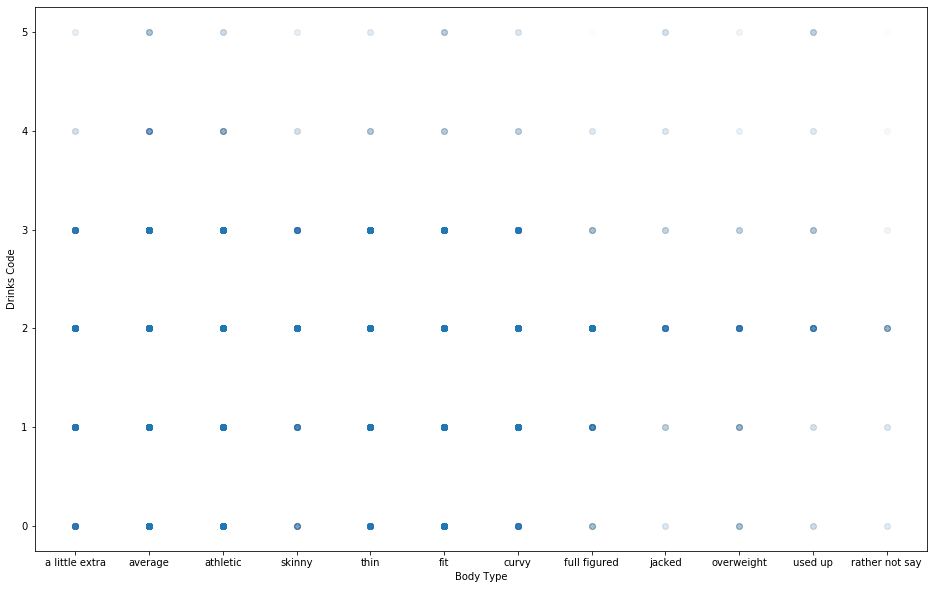

In [12]:
f, ax = plt.subplots(figsize = (16,10))
plt.scatter(df_ohne_nan.body_type, df_ohne_nan.drinks_code, alpha = 0.01)
plt.xlabel('Body Type')
plt.ylabel('Drinks Code')
plt.show()

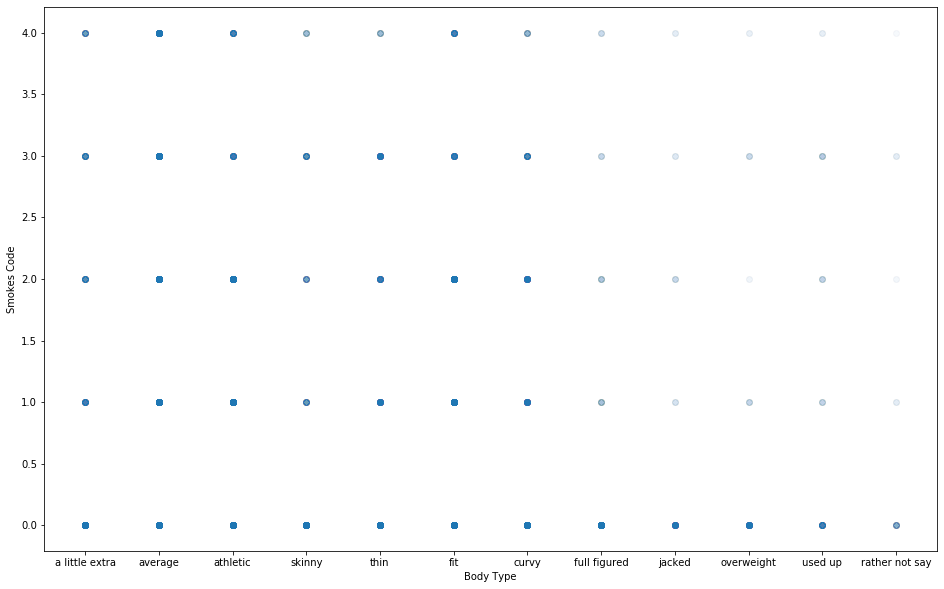

In [13]:
f, ax = plt.subplots(figsize = (16,10))
plt.scatter(df_ohne_nan.body_type, df_ohne_nan.smokes_code, alpha = 0.01)
plt.xlabel('Body Type')
plt.ylabel('Smokes Code')
plt.show()

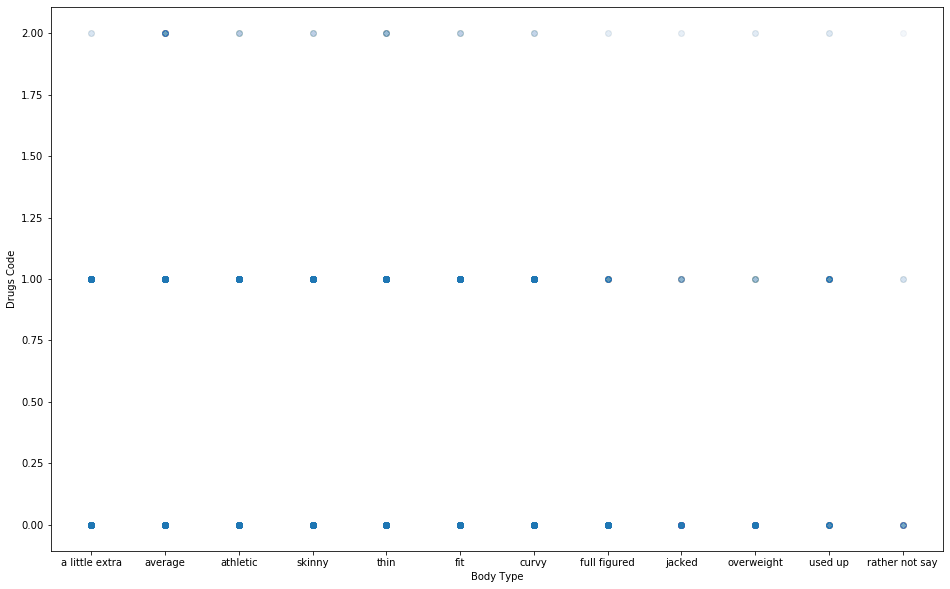

In [14]:
f, ax = plt.subplots(figsize = (16,10))
plt.scatter(df_ohne_nan.body_type, df_ohne_nan.drugs_code, alpha = 0.01)
plt.xlabel('Body Type')
plt.ylabel('Drugs Code')
plt.show()

In [18]:
df_body_diet = df_ohne_nan[['body_type', 'diet']]


,body_type,diet
0,a little extra,strictly anything
1,average,mostly other
7,average,mostly anything
9,athletic,mostly anything
11,average,mostly anything


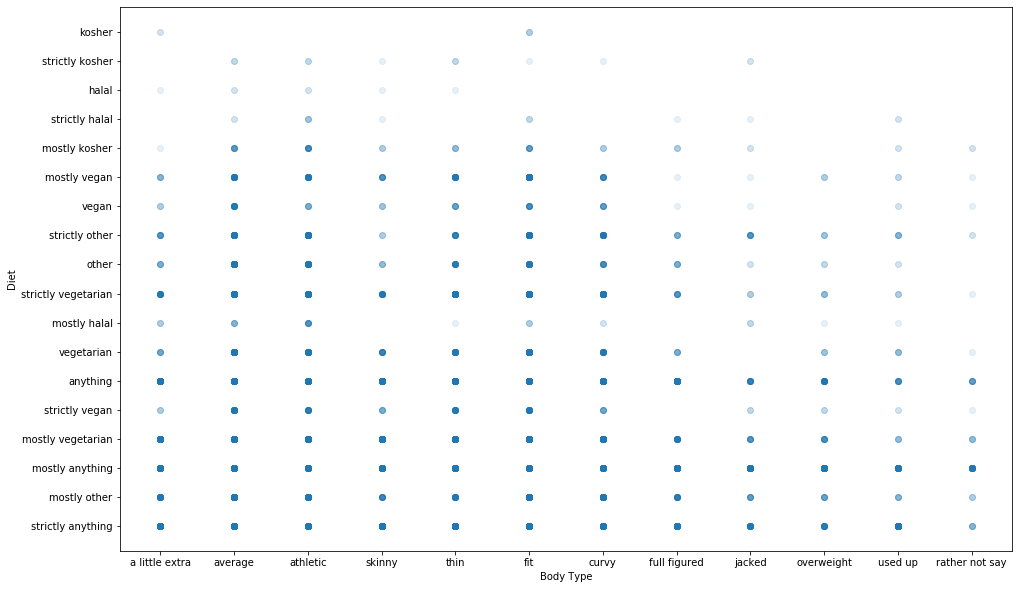

In [20]:
f, ax = plt.subplots(figsize = (16,10))
plt.scatter(df_body_diet.body_type, df_body_diet.diet, alpha = 0.1)
plt.xlabel('Body Type')
plt.ylabel('Diet')
plt.show()



In [7]:
training_data, validation_data, training_labels, validation_labels = train_test_split(df_features_all, df_labels, test_size = 0.2, random_state = 100)
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(training_data, training_labels.values.ravel())
print(clf.score(validation_data, validation_labels))



0.5609998016266614


0.5609998016266614
80


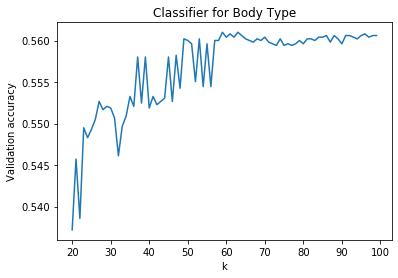

0.5500892680023804


C:\Users\muell\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [37]:
training_data, validation_data, training_labels, validation_labels = train_test_split(df_features_all, df_labels, test_size = 0.2, random_state = 100)


accuracies = []
for k in range(20,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(training_data, training_labels.values.ravel())
    knn_score = knn.score(validation_data, validation_labels)
    accuracies.append(knn_score)

print(max(accuracies))
print(len(accuracies))

plt.plot(range(20,100), accuracies)
plt.xlabel('k')
plt.ylabel('Validation accuracy')
plt.title('Classifier for Body Type')
plt.show()

forest = RandomForestClassifier(random_state = 1)
forest.fit(training_data, training_labels.values.ravel())
print(forest.score(validation_data, validation_labels))

0.5615949216425312
80


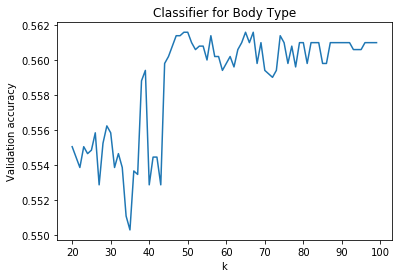

0.5592144415790518


C:\Users\muell\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [38]:
training_data, validation_data, training_labels, validation_labels = train_test_split(df_features_no_food, df_labels, test_size = 0.2, random_state = 100)


accuracies = []
for k in range(20,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(training_data, training_labels.values.ravel())
    knn_score = knn.score(validation_data, validation_labels)
    accuracies.append(knn_score)

print(max(accuracies))
print(len(accuracies))

plt.plot(range(20,100), accuracies)
plt.xlabel('k')
plt.ylabel('Validation accuracy')
plt.title('Classifier for Body Type')
plt.show()

forest = RandomForestClassifier(random_state = 1)
forest.fit(training_data, training_labels.values.ravel())
print(forest.score(validation_data, validation_labels))

0.5609998016266614
80


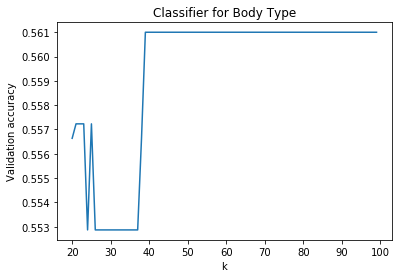

0.5609998016266614


C:\Users\muell\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [39]:
training_data, validation_data, training_labels, validation_labels = train_test_split(df_features_food, df_labels, test_size = 0.2, random_state = 100)


accuracies = []
for k in range(20,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(training_data, training_labels.values.ravel())
    knn_score = knn.score(validation_data, validation_labels)
    accuracies.append(knn_score)

print(max(accuracies))
print(len(accuracies))

plt.plot(range(20,100), accuracies)
plt.xlabel('k')
plt.ylabel('Validation accuracy')
plt.title('Classifier for Body Type')
plt.show()

forest = RandomForestClassifier(random_state = 1)
forest.fit(training_data, training_labels.values.ravel())
print(forest.score(validation_data, validation_labels))

In [40]:
training_data, validation_data, training_labels, validation_labels = train_test_split(df_features_all, df_labels, test_size = 0.2, random_state = 100)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for ker in kernels:
    svc = SVC(kernel = ker, gamma = 3, C = 1)
    svc.fit(training_data, training_labels.values.ravel())
    print(svc.score(validation_data, validation_labels))

0.5609998016266614
0.5592144415790518
0.5604046816107915
0.5020829200555446


In [41]:
training_data, validation_data, training_labels, validation_labels = train_test_split(df_features_food, df_labels, test_size = 0.2, random_state = 100)


kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for ker in kernels:
    svc = SVC(kernel = ker, gamma = 3, C = 1)
    svc.fit(training_data, training_labels.values.ravel())
    print(svc.score(validation_data, validation_labels))

0.5609998016266614
0.5609998016266614
0.5609998016266614
0.5609998016266614


In [42]:
training_data, validation_data, training_labels, validation_labels = train_test_split(df_features_no_food, df_labels, test_size = 0.2, random_state = 100)


kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for ker in kernels:
    svc = SVC(kernel = ker, gamma = 3, C = 1)
    svc.fit(training_data, training_labels.values.ravel())
    print(svc.score(validation_data, validation_labels))

0.5609998016266614
0.5609998016266614
0.5609998016266614
0.4967268399127157
